<a href="https://www.kaggle.com/arthurtok/interactive-porto-insights-a-plot-ly-tutorial">본문</a>


<a href="https://www.kaggle.com/sihwanyoon/interactive-porto-insight">번역</a>

In [2]:
os.getcwd()

'c:\\github\\kaggle\\Porto'

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('c:\\github\\kaggle\\Porto\\data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

c:\github\kaggle\Porto\data\sample_submission.csv
c:\github\kaggle\Porto\data\test.csv
c:\github\kaggle\Porto\data\train.csv


# Introduction
This competition is hosted by the third largest company in Brazil: Porto Seguro with the task of predicting the <i>probability that a driver will initiate an insurance claim in the next year.</i>

This notebook will aim to provide some interactive charts and analysis of the competition data by way of the Python visualization library Plot.ly and hopefully bring some insights and beautiful plots that others can take and replicate. Plot.ly is one of the main products offered by the software company - Plotly which specializes in providing online graphical and statistical visualizations (charts and dashboards) as well as providing an API to a whole rich suite of programming languages and tools such as Python, R, Matlab, Node.js etc.

Listed below for easy convenience are links to the various Plotly plots in this notebook:
- Simple horizontal bar plot - Used to inspect the Target variable distribution
- Correlation Heatmap plot - Inspect the correlation beween the different features
- Scatter plot - List in Descending order, the importance of the various faetures
- 3D scatter plot

The themes in this notebook can be briefly summarized follows:
1. **Data Quality Checks** - Visualizing and evaluating  all missing/Null values
2. **Feature inspection and filtering** - Correlation and feature Mutual information plots against the target variable. Inspection of the Binary, categorical and other variables.
3. **Feature importance ranking via learning models** - Building a Random Forest and Gradient Boosted model to help us rank features based off the learning process.

Let's go


In [4]:
# Let us load in the relevant Python modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import warnings
from collections import Counter
from sklearn.feature_selection import mutual_info_classif
warnings.filterwarnings('ignore')

In [6]:
train = pd.read_csv('./data/train.csv')
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [7]:
# Taking a look at how many rows and columns the train dataset contains
rows = train.shape[0]
columns = train.shape[1]
print("The train dataset contains {0} rows and {1}columns".format(rows, columns))

The train dataset contains 595212 rows and 59columns


# 1. Data Quality checks
**Null or missing values check**


As part of our quality checks, let us quick look at whether there are any null values in the train dataset as follows:

In [8]:
# any() applied twice to check run the isnull check across all columns
train.isnull().any().any()

False

- Our null values check returns Flase but however, this does not really mean this case has been closed as the data is also described as "Values of -1 indicate that the feature was missing from the observation" Therefore I take it that Porto Seguro has simply conducted a blanket replacement of all null values in the data with the value of -1. Let us now inspect if there where any missing values in the data.

Here we can see that which columns contained -1 in their values so we could easily for example make a blanket replacement of all -1 with nulls first as follows:

In [9]:
train_copy = train.copy()
train_copy = train_copy.replace(-1, np.NaN)

Next, we can use resident Kaggler's Aleksey Bilogur - creator of the "Missingno" package which is a most useful and convenient tool in visualizing missing values in the dataset, so check it out

In [10]:
train_copy.columns[39:]

Index(['ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05',
       'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10',
       'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin'],
      dtype='object')

<AxesSubplot:>

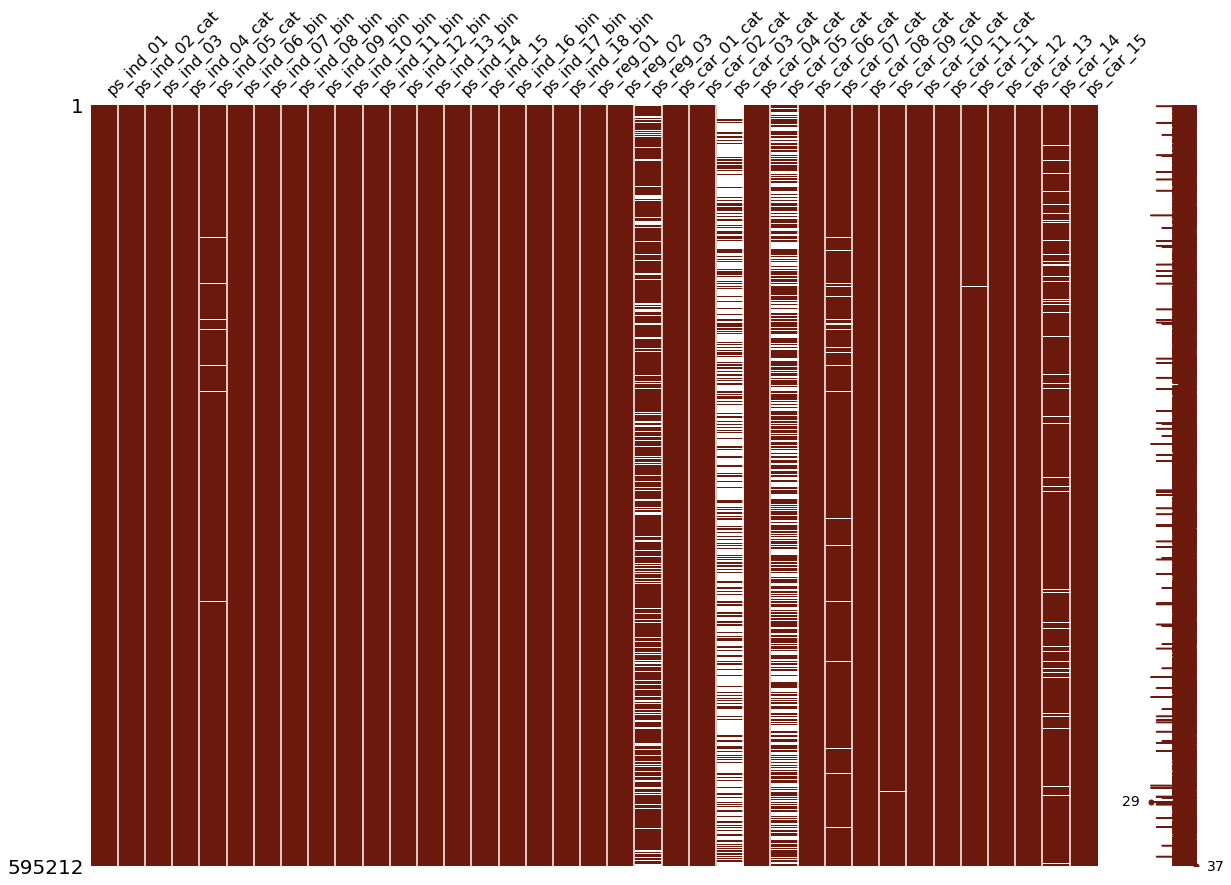

In [11]:
import missingno as msno
# Nullity or missing values by columns
msno.matrix(df=train_copy.iloc[:,2:39], figsize=(20,14), color=(0.42,0.1,0.05))
# id와 target값을 제외하고 출력하기 위해 2:39
# 왜 39부터는 확인을 안 하지??

<AxesSubplot:>

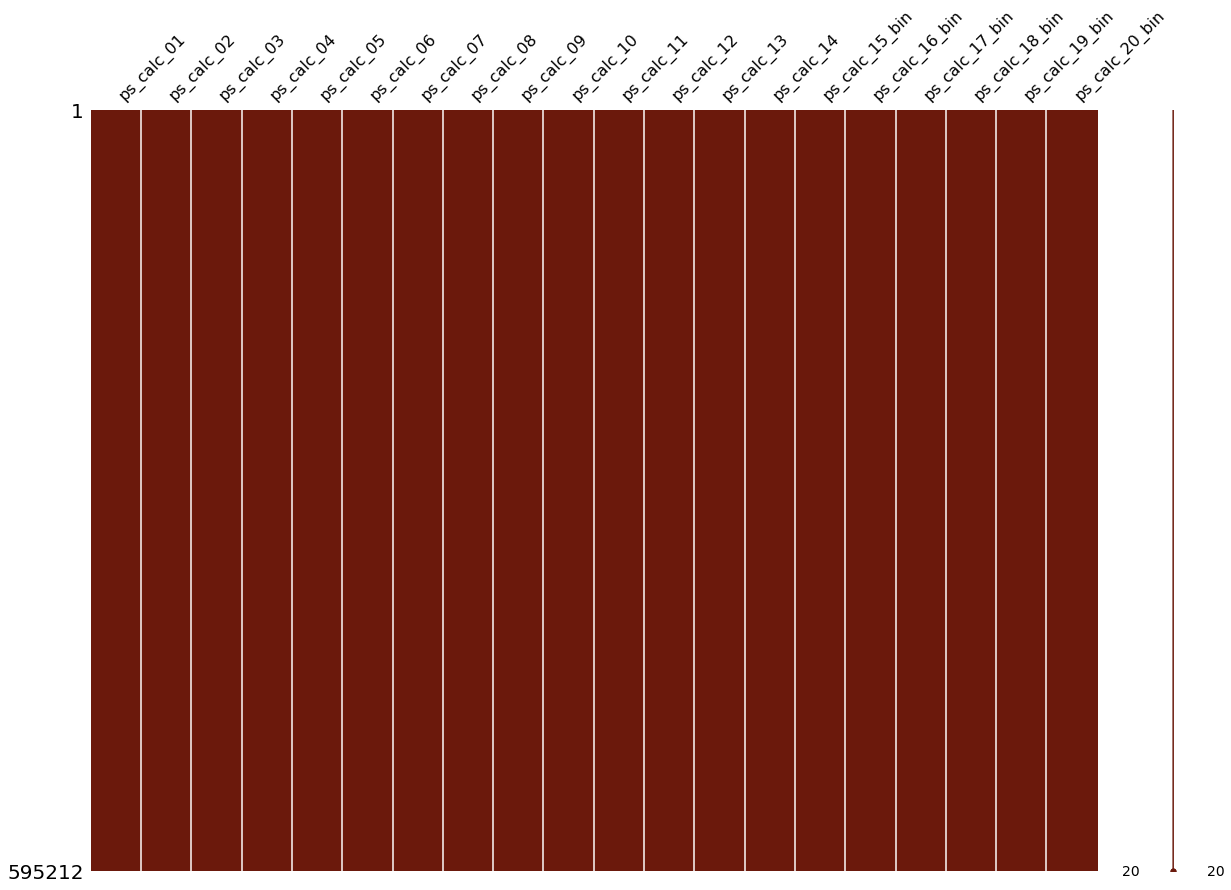

In [12]:
msno.matrix(df=train_copy.iloc[:,39:], figsize=(20,14), color=(0.42,0.1,0.05))

As we can see, the missing values now become much more apparent and clear when we visualize it, where the empty white bands (data that is missing) superposed on the vertical dark red bands (non missing data) reflect the nullity of the data in that particular column. In this instance, we can observe that there are 7 features out of the 59 total features (although as rightly pointed out by Justin Nafe in the comments section there are really a grand total of 13 columns with missing values) that actually contained null values. This is due to the fact that the missingno matrix plot can only comfortable fit in approximately 40 odd features to one plot after which some columns may be excluded, and hence the remaining 5 null columns have been excluded. To visualize all nulls, try changing the figsize argument as well as tweaking how we slice the dataframe.

For the 7 null columns that we are able to observe, they are hence listed here as follows:

**ps_ind_05_cat | ps_reg_03 | ps_car_03_cat | ps_car_05_cat | ps_car_07_cat | ps_car_09_cat | ps_car_14**

Most of the missing values occur in the columns suffixed with _cat. One should really take further note of the columns ps_reg_03, ps_car_03_cat and ps_car_05_cat. Evinced from the ratio of white to dark bands, it is very aparent that a big majority of values are missing from these 3 columns, and therefore a blanket replacement of -1 for the nulls might not be a very good strategy.

### Target Variable inspection
Another standard check normally conducted on the data is with regards to our target variable, where in this case, the column is conveniently titled "target". The target value also comes by the moniker of class/label/correct answer and is used in supervised learning models along with the corresponding data that is given (in our case all our train data except the id column) to learn the function that best maps the data to our target in the hope that this learned function can generalize and predict well with new unseen data.


In [13]:
dir(go)

['AngularAxis',
 'Annotation',
 'Annotations',
 'Area',
 'Bar',
 'Barpolar',
 'Box',
 'Candlestick',
 'Carpet',
 'Choropleth',
 'Choroplethmapbox',
 'ColorBar',
 'Cone',
 'Contour',
 'Contourcarpet',
 'Contours',
 'Data',
 'Densitymapbox',
 'ErrorX',
 'ErrorY',
 'ErrorZ',
 'Figure',
 'FigureWidget',
 'Font',
 'Frame',
 'Frames',
 'Funnel',
 'Funnelarea',
 'Heatmap',
 'Heatmapgl',
 'Histogram',
 'Histogram2d',
 'Histogram2dContour',
 'Histogram2dcontour',
 'Image',
 'Indicator',
 'Isosurface',
 'Layout',
 'Legend',
 'Line',
 'Margin',
 'Marker',
 'Mesh3d',
 'Ohlc',
 'Parcats',
 'Parcoords',
 'Pie',
 'Pointcloud',
 'RadialAxis',
 'Sankey',
 'Scatter',
 'Scatter3d',
 'Scattercarpet',
 'Scattergeo',
 'Scattergl',
 'Scattermapbox',
 'Scatterpolar',
 'Scatterpolargl',
 'Scatterternary',
 'Scene',
 'Splom',
 'Stream',
 'Streamtube',
 'Sunburst',
 'Surface',
 'Table',
 'Trace',
 'Treemap',
 'Violin',
 'Volume',
 'Waterfall',
 'XAxis',
 'XBins',
 'YAxis',
 'YBins',
 'ZAxis',
 '_BaseFrameHierarc

In [14]:
data = [go.Bar(
            x = train['target'].value_counts().index.values,
            y = train['target'].value_counts(),
            text = 'Distribution of target variable' # 마우스를 올렸을 때 나오는 텍스트
)]

layout = go.Layout(
    title="Target variable distribution") # figure 제목

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')

Hmmm, the target variable is rather imbalanced so it might be something to keep in mind. An imbalanced target will prove quite.

1. graph object로 그래프를 지정해준다.
2. layout으로 그래프의 제목을 지어준다
3. 그래프를 figure에 할당한다
4. py.iplot을 이용해 시각화한다.

### Datatype check
This check is carried out to see what of datatypes the train set is compirsed of :integers or characters or floats just to gain a better overview of the data we were provide with. One trick to obtain counts of the unique types in a python sequence is to use the Counter method, when you import Collections module as follows:


### 데이터타입 확인
train이 어떤 데이터 타입들로 이루어졌나 확인하기 위함. Collections 모듈의 Counter 메소드로 간단하게 확인(trick)

In [15]:
Counter(train.dtypes.values)

Counter({dtype('int64'): 49, dtype('float64'): 10})

As alluded to above, there are a total 59 columns that make up the train dataset and as we can observe from this check, the features/columns consist of only two datatypes - integer and floats.

Another point to note is that Porto Seguro has actually provided us data with headers that come suffixed with abbreviations such as "_bin", "_cat" and "_reg", where they have given us a rough explanation that _bin indicates binary features while _cat indicates categorical features whilst the rest are either continuos or odinal features. Here I shall simplify this a bit further just by looking at float values(probably only the continuos features) and integer datatypes (binary, categorical and ordinal features).

In [15]:
# 칼럼의 자료형이 float64인 것은 train_float, int64인 것은 train_int에 저장
train_float = train.select_dtypes(include=['float64'])
train_int = train.select_dtypes(include=['int64'])